## 5.5. Data Modeling

- Setting up an SQL connection with sqlalchemy
- Creating SQL database according to Entity relationship diagram:
- Joins and Foreign Keys in SQL

### Setting up an SQL connection with sqlalchemy

In [2]:
import os
import pandas as pd
from sqlalchemy import text, create_engine

In [3]:
HOST = 'localhost' # you can use your RDS instance here as well
USERNAME = 'postgres'
PORT = '5432'
DB = 'postgres'
PASSWORD = '********'

In [4]:
conn_string = f'postgresql://{USERNAME}:{PASSWORD}@{HOST}:{PORT}/{DB}'

In [5]:
engine = create_engine(conn_string)

In [5]:
type(engine)

sqlalchemy.engine.base.Engine

### Creating SQL database according to Entity relationship diagram:

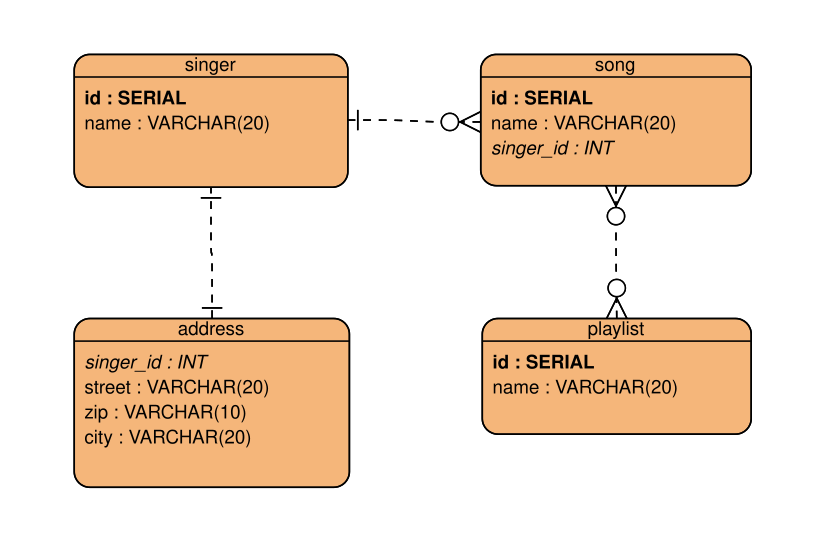

In [23]:
# creating singer table 
query = '''
CREATE TABLE IF NOT EXISTS singer (
    id SERIAL PRIMARY KEY,
    name VARCHAR
)
'''

In [24]:
engine.execute(query)

In [25]:
# inserting data to singer table 
insert_singer = engine.execute('''
INSERT INTO singer (id, name) 
VALUES (1, 'Nicki Minaj'), (2, 'Lady Gaga'), (3, 'Taylor Swift'), (4, 'Tom Jones')
''')

In [28]:
# select all item from sql database and open in pandas
singer_df = pd.read_sql_query('''SELECT * from singer''', engine)
singer_df

,id,name
0,1,Nicki Minaj
1,2,Lady Gaga
2,3,Taylor Swift
3,4,Tom Jones


In [22]:
# engine.execute('''DELETE FROM singer''')

In [20]:
# creating song table 
engine.execute('''
CREATE TABLE IF NOT EXISTS song (
    id SERIAL PRIMARY KEY,
    name VARCHAR,
    singer_id INTEGER,

    FOREIGN KEY(singer_id)
      REFERENCES singer(id) ON DELETE CASCADE
   )
''')

In [29]:
# inserting data to song table 
engine.execute('''
INSERT INTO song (id, name, singer_id) 
VALUES (1, 'Anaconda', 1), (2, 'Paparazzi', 2), (3, 'Bad Romance', 3), (4, 'Sex Bomb', 4)
''')

In [30]:
# select all item from sql database and open in pandas
song_df = pd.read_sql_query('''SELECT * from song''', engine)
song_df

,id,name,singer_id
0,1,Anaconda,1
1,2,Paparazzi,2
2,3,Bad Romance,3
3,4,Sex Bomb,4


In [ ]:
# creating address table 
engine.execute('''
CREATE TABLE IF NOT EXISTS address (
    singer_id INT,
    zip VARCHAR(10),
    city VARCHAR(20),

    FOREIGN KEY(singer_id)
      REFERENCES singer(id) ON DELETE CASCADE
   )
''')

In [34]:
# creating address table 
engine.execute('''
CREATE TABLE IF NOT EXISTS playlist (
    id SERIAL PRIMARY KEY,
    name VARCHAR(20)
   )
''')

We can reference the singer table from song in SQL using the FOREIGN KEY constraint:

In both tables the id column uniquely identifies the rows and serves as the primary key. However, the songs table also has a column singer_id that contains the id of a row from the singers table.

The singer_id is what we call a foreign key. It indicates a relation between the data in the two different rows in two different tables.

foreign keys are generally unidirectional

the referenced entry must exist before adding a referencing entry

building two-way references is not possible, or if the current PostGreS version allows it, generally a bad idea

once you have your tables and foreign keys in place and filled with data, it becomes costly to change everything

that means designing your data model is worth some thought

the optional ON DELETE CASCADE will delete the referencing entry if a referenced entry is deleted.

### SQL Joins

In [38]:
join = '''
SELECT singer.name AS singer_name, song.name AS song_name
FROM singer
JOIN song
ON singer.id = song.singer_id;
'''

This is INNER JOIN. It excludes rows from both tables that do not match. An OUTER JOIN includes rows from one or both of the tables that do not match with null values in columns for which there is no data.

In [39]:
join_df = pd.read_sql_query(join, engine)
join_df

,singer_name,song_name
0,Nicki Minaj,Anaconda
1,Lady Gaga,Paparazzi
2,Taylor Swift,Bad Romance
3,Tom Jones,Sex Bomb
